In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.integrate as integrate
%matplotlib inline

In [161]:
class Portfolio:
    def __init__(self, num_stocks):
        self.num_stocks = num_stocks
        self.stocks = []
        self.returns = np.random.randn(self.num_stocks)
        self.stocks = np.exp(np.random.randn(self.num_stocks)) #create n stocks witch normal distributed
        self.stocks = self.stocks/self.stocks.sum() #normalize
        self.cost = np.sum(self.returns) #the cost of portfolio
    
#     def specificWeight(self):
        
        
    def returnCheck(self):
        self.portfolioReturn = np.dot(self.returns, self.stocks)
        return self.portfolioReturn
    
    def portfolioRisk(self, covMatrix):
        return np.sqrt(np.matmul(np.matmul(self.stocks, covMatrix.values), self.stocks))
    
    def portfolioRisk2(self, var):
        return np.dot(self.stocks, np.sqrt(var))

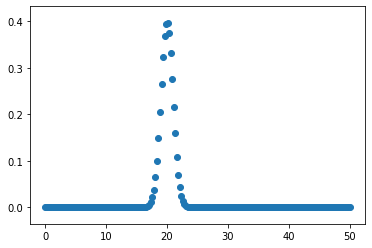

Expectation of portfolio return:  19.999999999999996


In [162]:
def normalPDF(x, exp, var):
    return (1/(np.sqrt(2*np.pi)*np.sqrt(var))) * np.exp((-(x-exp)**2) / (2*var))
    
def expectation(func, a, b):
    return quad(func, a, b)

r = normalPDF(4, 2, 1)
listX = np.linspace(0, 50, 200)
listY = list(map(lambda x: normalPDF(x, 20, 1), listX))
plt.scatter(listX, listY)
plt.show()
return_Expectation = expectation(lambda x: x*normalPDF(x, 20, 1), 0, 50)[0]
print('Expectation of portfolio return: ', return_Expectation)

### Initialize portfolio

In [163]:
num_stocks = 5
portfolio1 = Portfolio(num_stocks)
stocks = portfolio1.stocks

returns1 = np.array([])
exp1 = np.random.randint(1, 50, num_stocks) #avereage returns
var1 = np.random.uniform(0, 10, num_stocks) #variance of returns
for item in range(num_stocks):
    returns1 = np.append(returns1, normalPDF(exp1[item], exp1[item], var1[item]))
    
print(f'Specific weights: {stocks}', f'| the control sum: {np.sum(stocks)}')
portfolio1.returns = returns1
print('\nReturns of each stocks: ', portfolio1.returns)

Specific weights: [0.12428357 0.20985986 0.18177775 0.35800201 0.12607681] | the control sum: 1.0

Returns of each stocks:  [0.19173273 0.13231771 0.81277245 0.34532365 0.16133301]


### Portfolio return

In [164]:
#Portfolio return
print(portfolio1.returnCheck())

0.3433082629305077


### Portfolio risk

In [165]:
close = np.exp(np.random.randn(num_stocks)) #create n stocks witch normal distributed
close = close/close.sum()
df = pd.DataFrame([stocks, close])
covMatrix = df.cov()
covMatrix

,0,1,2,3,4
0,0.000230,-0.002775,0.001243,0.003273,-0.001971
1,-0.002775,0.033548,-0.015028,-0.039571,0.023826
2,0.001243,-0.015028,0.006732,0.017726,-0.010673
3,0.003273,-0.039571,0.017726,0.046674,-0.028103
4,-0.001971,0.023826,-0.010673,-0.028103,0.016921


In [166]:
portfolio1.portfolioRisk(covMatrix)

0.03930296930392577

In [168]:
portfolio1.portfolioRisk2(var1)

1.7059082540716417

### Several portfolios

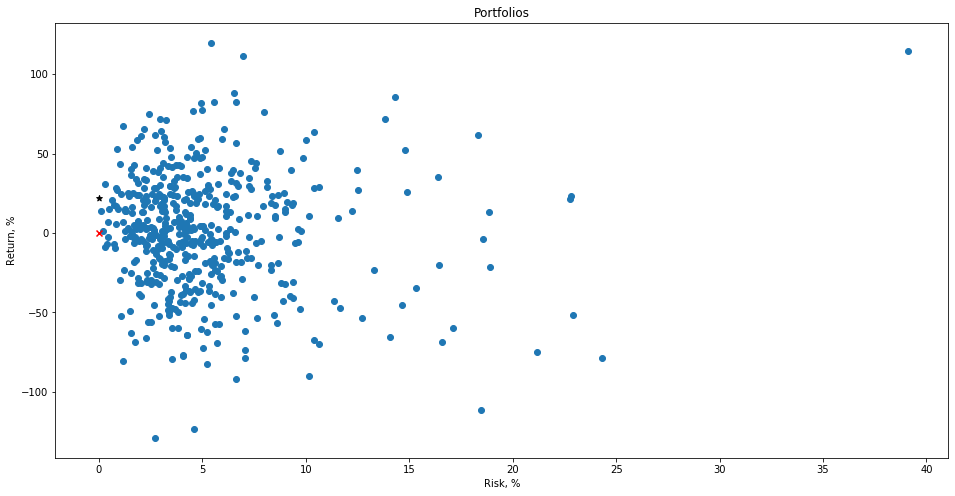

In [119]:
numPort = 500
num_stocks = 15

risks = np.zeros(numPort)
returns = np.zeros(numPort)

for port in range(numPort):
    portfolio = Portfolio(num_stocks)
    
    close = np.exp(np.random.randn(num_stocks)) #create n stocks witch normal distributed
    close = close/close.sum()
    df = pd.DataFrame([portfolio.stocks, close])
    covMatrix = df.cov()
    
    risks[port] = portfolio.portfolioRisk(covMatrix)
    returns[port] = portfolio.returnCheck()
    
plt.figure(figsize=(16,8))
plt.scatter(risks*100, returns*100)
plt.xlabel('Risk, %')
plt.ylabel('Return, %')
plt.title('Portfolios')

minRisk = np.argmin(risks)
plt.scatter(risks[minRisk], returns[minRisk], c='red', marker='x')

meanPortfolio = Portfolio(num_stocks)
meanPortfolio.stocks = np.ones(num_stocks)/num_stocks
close = np.ones(num_stocks)/num_stocks #create n stocks witch normal distributed
close = close/close.sum()
df = pd.DataFrame([meanPortfolio.stocks, close])
covMatrix = df.cov()
plt.scatter(meanPortfolio.portfolioRisk(covMatrix)*100, meanPortfolio.returnCheck()*100, marker='*', c='black')

plt.show()